<a href="https://colab.research.google.com/github/BlessedMut/AI/blob/master/Customer%20Churning%20using%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import os
import pickle

from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import auc, roc_auc_score
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
Churn =pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


0)	Using the given dataset extract the relevant features that can define a customer churn.	

In [ ]:
value_cols = Churn[['tenure','MonthlyCharges','SeniorCitizen']]

cols = ['customerID', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn']

Churn = Churn[cols].apply(lambda col: col.astype('category'))

le = LabelEncoder()
Churn = Churn[cols].apply(le.fit_transform)
df = pd.concat([value_cols, Churn], axis=1)
df

,tenure,MonthlyCharges,SeniorCitizen,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,1,29.85,0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,34,56.95,0,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,2,53.85,0,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,45,42.30,0,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,2,70.70,0,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,4853,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0
7039,72,103.20,0,1525,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0
7040,11,29.60,0,3367,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,2994,0
7041,4,74.40,1,5934,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,2660,1


1)	Using relevant mapping features show features which have the strongest correlation with churning.                                                                             

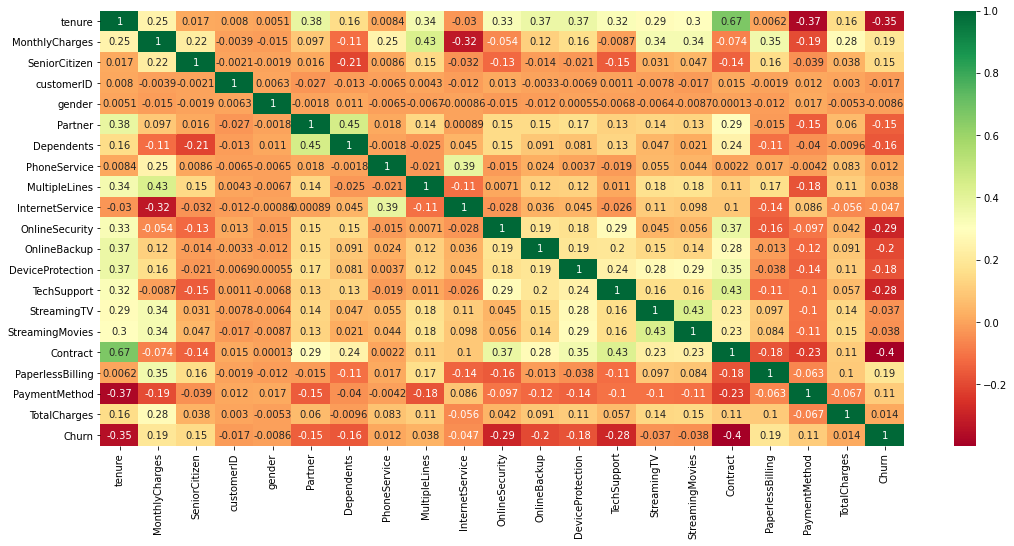

In [ ]:
cor = df.corr()
top_corr_features = cor.index
plt.figure(figsize=(18,8))
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

features = df[['Contract','DeviceProtection','OnlineBackup','OnlineSecurity','MultipleLines',
               'Partner','MonthlyCharges','tenure','Dependents','PhoneService','TechSupport',
               'StreamingTV','StreamingMovies','PaperlessBilling','Churn']]

2)	 Using the features in (i) define and train an Extreme Gradient Boosting “XGBOOST” model .                                                                                       

In [ ]:
X = features.iloc[:, 0:-1]
Y = features.iloc[:,-1]

X = np.array(X).reshape(-1,14)
Y = np.array(Y).reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42) 

In [ ]:
if os.path.exists('trained_model.pkl'):
  print("Loading Trained Model...")
  clf = joblib.load('trained_model.pkl')
  print("Model Loaded Successfully...")
else:
  print("Training model....please wait...")
  

  clf = XGBClassifier(learning_rate=.1, n_estimators=100, max_depth=6, sampling_method='gradient_based')
  clf.fit(x_train, y_train)
  joblib.dump(clf, 'trained_model.pkl')
  print("Model trained and saved successfully...")


Loading Trained Model...
Model Loaded Successfully...


3)	Evaluate the model’s accuracy and calculate the AUC value.  [5]

In [ ]:
print(f'Accuracy : {roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])*100:.0f}%')

Accuracy : 87%


4)	Create a web based platform to host the model using heroku or Streamlite. [10]                                                                             

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import os
import pickle

import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import auc, roc_auc_score
from xgboost import XGBClassifier

st.title("Teleco Data Statistics")
st.write("Predict Churning of customers by filling the form below!!!")
st.text("Please fill all fields with (*)")

st.sidebar.text("ver 1.0")

from google.colab import drive
drive.mount('/content/drive')
Churn =pd.read_csv('/content/drive/My Drive/Colab Notebooks/AI/datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')


value_cols = Churn[['tenure','MonthlyCharges','SeniorCitizen']]

cols = ['customerID', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn']

Churn = Churn[cols].apply(lambda col: col.astype('category'))

le = LabelEncoder()
Churn = Churn[cols].apply(le.fit_transform)
df = pd.concat([value_cols, Churn], axis=1)


col1, col2 = st.beta_columns(2)

with col1:
	contract = st.number_input('Contract*', min_value=0.0, step=.1)
	online_backup = st.number_input('Online Backup*', min_value=0.0, step=.1)
	online_security = st.number_input('Online Security*', min_value=0.0, step=.1)
	multiple_lines = st.number_input('Multiple Lines*', min_value=0.0, step=.1)
	partner = st.number_input('Partner*', min_value=0.0, step=.1)
	monthly_charges = st.number_input('Monthly Charges*', min_value=0.0, step=.1)
	tenure = st.number_input('Tenure*', min_value=0.0, step=.1)

with col2:
	device_protection = st.number_input('Device Protection*', min_value=0.0, step=.1)
	dependents = st.number_input('Dependents*', min_value=0.0, step=.1)
	phone_service = st.number_input('Phone Service*', min_value=0.0, step=.1)
	tech_support = st.number_input('Tech Support*', min_value=0.0, step=.1)
	streaming_tv = st.number_input('Streaming TV*', min_value=0.0, step=.1)
	streaming_movies = st.number_input('Streaming Movies*', min_value=0.0, step=.1)
	paperless_billing = st.number_input('Paperless Billing*', min_value=0.0, step=.1)

def build_model():


	if os.path.exists('trained_model.pkl'):
	  print("Loading Trained Model...")
	  clf = joblib.load('trained_model.pkl')
	  print("Model Loaded Successfully...")
	else:
		print("Training model....please wait...")

		Churn = pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

		value_cols = Churn[['tenure','MonthlyCharges','SeniorCitizen']]

		cols = ['customerID', 'gender', 'Partner', 'Dependents',
		       'PhoneService', 'MultipleLines', 'InternetService',
		       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
		       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
		       'PaymentMethod', 'TotalCharges', 'Churn']

		Churn = Churn[cols].apply(lambda col: col.astype('category'))

		le = LabelEncoder()
		Churn = Churn[cols].apply(le.fit_transform)
		df = pd.concat([value_cols, Churn], axis=1)
		features = df[['Contract','DeviceProtection','OnlineBackup','OnlineSecurity','MultipleLines',
	               'Partner','MonthlyCharges','tenure','Dependents','PhoneService','TechSupport',
	               'StreamingTV','StreamingMovies','PaperlessBilling','Churn']]

		X = features.iloc[:, 0:-1]
		Y = features.iloc[:,-1]

		X = np.array(X).reshape(-1,14)
		Y = np.array(Y).reshape(-1,1)

		x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42) 

		clf = XGBClassifier(learning_rate=.1, n_estimators=100, max_depth=6, sampling_method='gradient_based')
		clf.fit(x_train, y_train)
		joblib.dump(clf, 'trained_model.pkl')
		print("Model trained and saved successfully...")

	return clf

def predict(contract, device_protection, online_backup, online_security, multiple_lines, partner,monthly_charges, tenure, dependents, phone_service, tech_support, streaming_tv, streaming_movies,paperless_billing):
	clf = build_model()
	pred = clf.predict([[contract, device_protection, online_backup, online_security, multiple_lines, partner,monthly_charges, tenure, dependents, phone_service, tech_support, streaming_tv, streaming_movies,paperless_billing]])
	pred = le.inverse_transform(pred)

	return pred

result = predict(contract, device_protection, online_backup, online_security, multiple_lines, partner,monthly_charges, tenure, dependents, phone_service, tech_support, streaming_tv, streaming_movies,paperless_billing)

st.write("Is customer likely to churn - " + str(result[0]))


Overwriting app.py


5)	Allow users to use the application to enter new data and your model should predict if the supplied data of a new customer can result in a churn or not giving the confidence factor of  the model.                                     

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok==4.1.1

In [ ]:
!ngrok authtoken 1tkOwquiNdFEZWDxJoEt698Puce_7N8tTduF58qa1vtaYBYnd

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok

In [ ]:
!streamlit run app.py&>/dev/null&

In [ ]:
!pgrep streamlit

420
487
578
740
786


In [ ]:
pub_url = ngrok.connect(port='8501')

In [ ]:
pub_url

'http://c5d315dfa3f1.ngrok.io'